# **Movie Rating Prediction**

## **Project Overview**
The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.


## **Data Understanding**
The dataset is obtained from Kaggle: [IMDb India Movies](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)     

The dataset has the following columns:

Name : Movie name   
Year : release year of the movies   
Duration : Movie duration   
Genre : Movie genre    
Rating : Movie rating    
Votes : Number of votes received    
Director : Movie director   
Actor 1 : First main actor    
Actor 2 : Second main actor    
Actor 3 : Third main actor   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

from __future__ import print_function
import sys
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings("ignore")

In [3]:
# preview the dataset
df = pd.read_csv("Data Files\IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


The dataseet has 15509 entries and 10 columns

In [15]:
# get summary statistics of the datset
df.describe()


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [17]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [19]:
df.shape

(15509, 10)

## **Data Preparation**

#### Check for missing values

In [23]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#### Dealing with the missing values

The rows from our dataset where the 'Rating' information was not available is droppped

In [29]:
df.dropna(subset=['Rating'], inplace=True)

In [31]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

The missing entries in Genre will be replaced by Unknown

In [34]:
df['Genre'].fillna('Unknown', inplace=True)

In [36]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

Impute missing values in 'Duration' with the median

In [39]:
# Extract numeric values from 'Duration' and convert to integers
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Impute missing values in 'Duration' with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)


The missing entries in the subset Actor 1, actor 2 and actor 3 will be dropped

In [42]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [46]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

#### Check for duplicates

In [48]:
df.duplicated().sum()

0

The data has no duplicates

#### Check Data Types

In [56]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Change the data type of both Year and Votes column to numerical data types

In [59]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)

In [61]:
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [63]:
df.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [65]:
# preview the clean dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## **Exploratory Data Analysis**

#### Rating Analysis

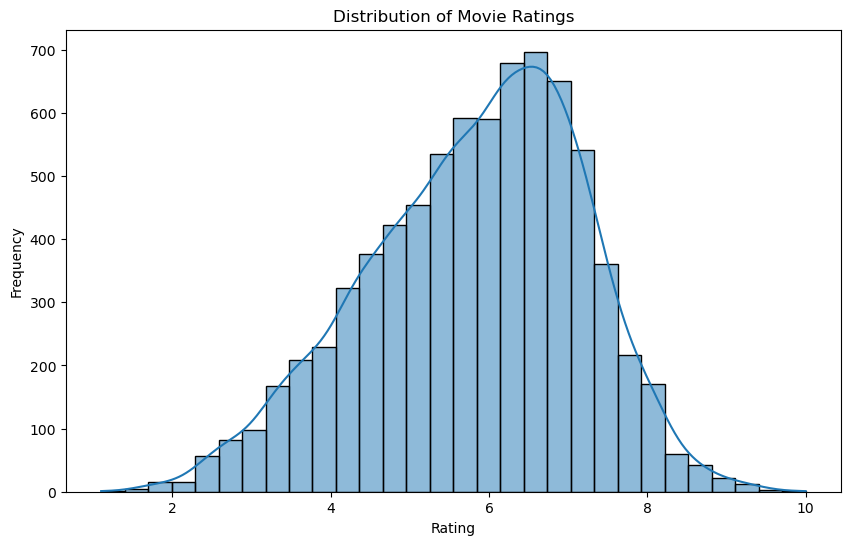

In [73]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


$Inferences$ 
*  Rating Distribution: The histogram shows a slightly normal distribution with a peak around a 7 rating value.
*  Common Rating Range falls between 5 to 7.
* All ratings are positive 
* There are few movies rated below 2 and above 8

#### Votes Analysis

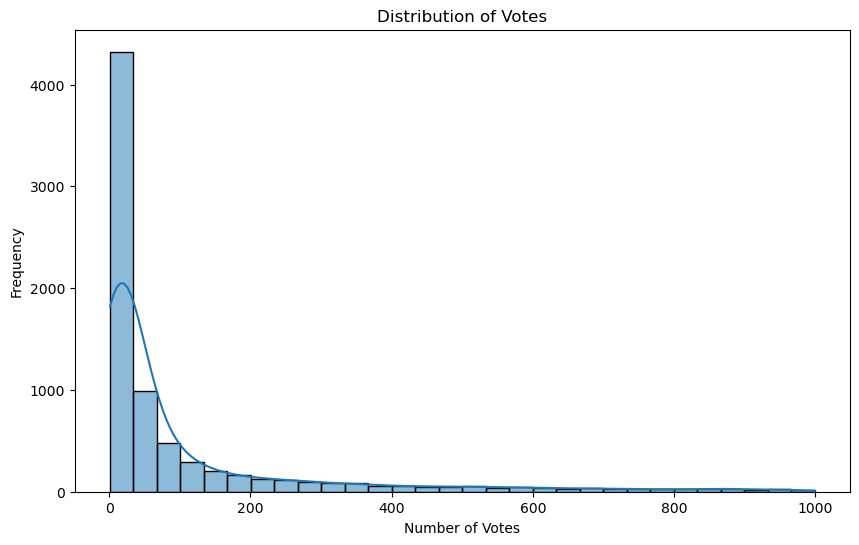

In [77]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

$Inference$ 
* The distribution of votes is right-skewed, with the majority of movies receiving a relatively low number of votes. This suggests that many movies in the dataset may not be widely recognized or popular, as they have received fewer votes
* The long tail towards higher vote counts indicates that there are a smaller number of movies that have garnered a significant number of votes
* Popularity Range is between 0 and 50

## **Feature Encoding and Scaling**

In [199]:
# List of categorical and numerical columns
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_columns = ['Duration', 'Votes']


In [200]:
# Preprocessing pipelines for categorical and numerical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


In [203]:
# Combine both categorical and numerical pipelines into one
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_columns),
    ('num', numerical_pipeline, numerical_columns)
])


In [205]:
# Prepare the data
X = df.drop(columns=['Rating', 'Name'])
y = df['Rating']

## **Model Training and Hyperparameter Tuning**

In [207]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [209]:
# Define the RandomForest model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [213]:
# Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}


In [215]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Genre',
                                                                          'Director',
                                                                          'Actor '
                                                                          '1',
                                                                          'Actor '
                                                                          '2',
                                                                          'Actor '
                                                                          '3']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Duration',
                                                                          'Votes'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [217]:
# Best parameters found by grid search
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}


In [218]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [219]:
# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.60545012111896
R^2 Score: 0.15931506945663998


## Model Evaluation

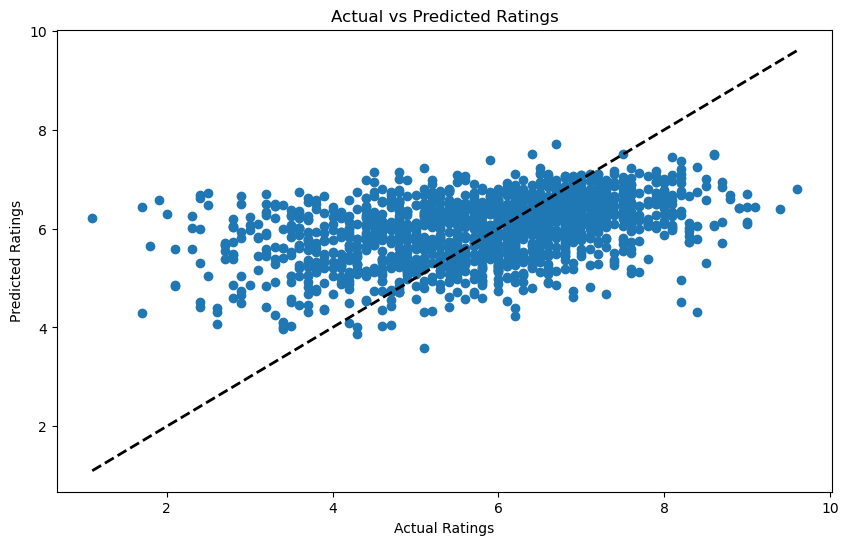

In [221]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
